### This Notebook:
- try to get model that give good accuracy of segmentation
- define background remove functions

In [1]:
from PIL import ImageOps,Image ,ImageFilter
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np


c:\Users\LapStore\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
### to load dataset from huggingface
import datasets
from datasets import load_dataset

dataset = load_dataset("zhoubolei/scene_parse_150", trust_remote_code=True)

In [2]:
cache_dir = "./cache"

In [ ]:

sam_pipe = pipeline("image-segmentation", 
                    model="facebook/detr-resnet-50-panoptic", 
                    cache_dir=cache_dir)


### trying it not doing well on some images

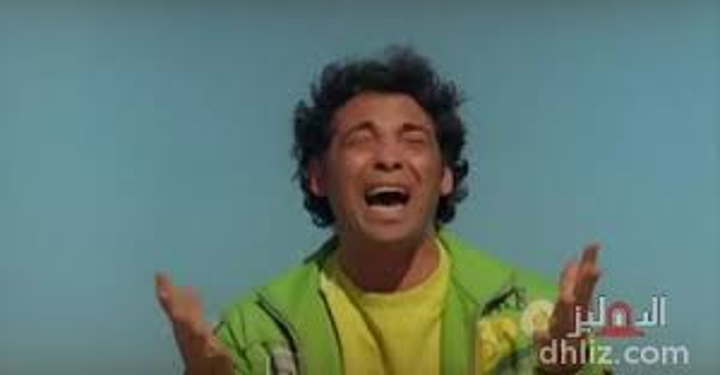

In [55]:
raw_image = Image.open('./pictures/6.jpg')
raw_image.resize((720, 375))

In [35]:
output = sam_pipe(raw_image, points_per_batch=32)
output

`label_ids_to_fuse` unset. No instance will be fused.


[{'score': 0.999674,
  'label': 'LABEL_187',
  'mask': <PIL.Image.Image image mode=L size=300x168>},
 {'score': 0.999512,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=300x168>}]

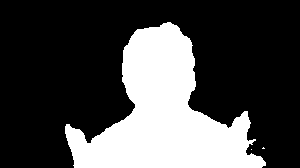

In [37]:
output[1]['mask']

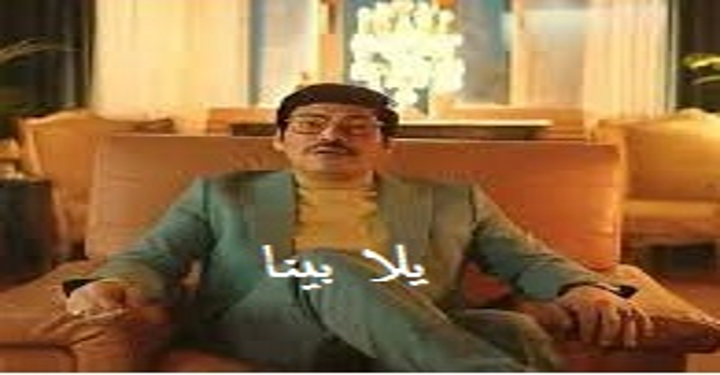

In [56]:
raw_image = Image.open('./pictures/7.jpg')
raw_image.resize((720, 375))

In [39]:
output = sam_pipe(raw_image, points_per_batch=32)
output

[{'score': 0.939062,
  'label': 'wall-wood',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': 0.908992,
  'label': 'cell phone',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': 0.994167,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': 0.940261,
  'label': 'chair',
  'mask': <PIL.Image.Image image mode=L size=195x176>}]

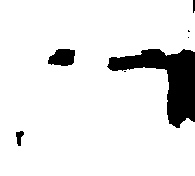

In [42]:
output[2]['mask']

as you see the model do ok at first image ,but bad on second image ,in addition it classify many objects not exist ,so i will other model

In [ ]:
cache_dir = "./cache"

pipe = pipeline("image-segmentation", model="Intel/dpt-large-ade")

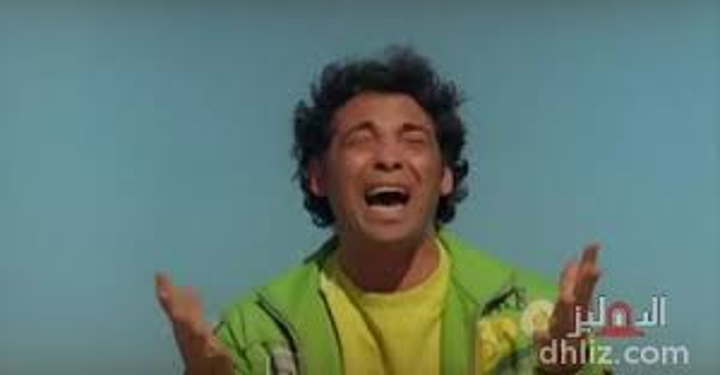

In [43]:
raw_image = Image.open('./pictures/6.jpg')
raw_image.resize((720, 375))

In [44]:
output = pipe(raw_image, points_per_batch=32)
output

[{'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=300x168>},
 {'score': None,
  'label': 'windowpane',
  'mask': <PIL.Image.Image image mode=L size=300x168>},
 {'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=300x168>},
 {'score': None,
  'label': 'door',
  'mask': <PIL.Image.Image image mode=L size=300x168>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=300x168>},
 {'score': None,
  'label': 'painting',
  'mask': <PIL.Image.Image image mode=L size=300x168>},
 {'score': None,
  'label': 'fence',
  'mask': <PIL.Image.Image image mode=L size=300x168>},
 {'score': None,
  'label': 'railing',
  'mask': <PIL.Image.Image image mode=L size=300x168>},
 {'score': None,
  'label': 'signboard',
  'mask': <PIL.Image.Image image mode=L size=300x168>}]

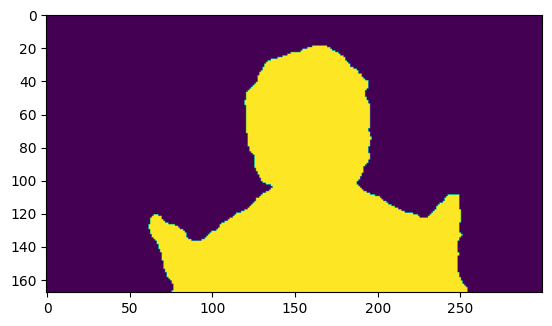

In [45]:
plt.imshow(np.array(output[2]['mask']))
plt.show()

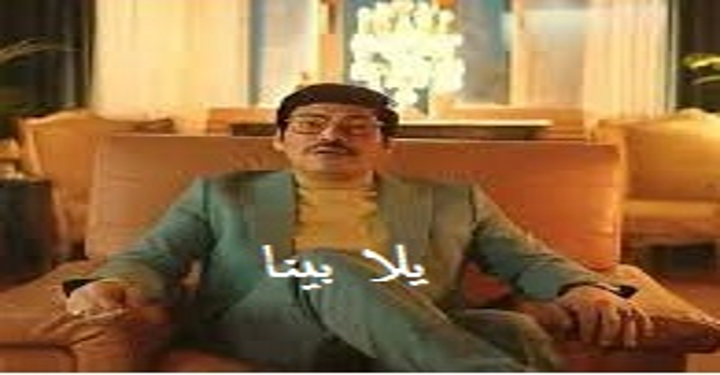

In [47]:
raw_image = Image.open('./pictures/7.jpg')
raw_image.resize((720, 375))


In [48]:
output = pipe(raw_image, points_per_batch=32)
output

[{'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': None,
  'label': 'floor',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': None,
  'label': 'windowpane',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': None,
  'label': 'painting',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': None,
  'label': 'sofa',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': None,
  'label': 'armchair',
  'mask': <PIL.Image.Image image mode=L size=195x176>},
 {'score': None,
  'label': 'signboard',
  'mask': <PIL.Image.Image image mode=L size=195x176>}]

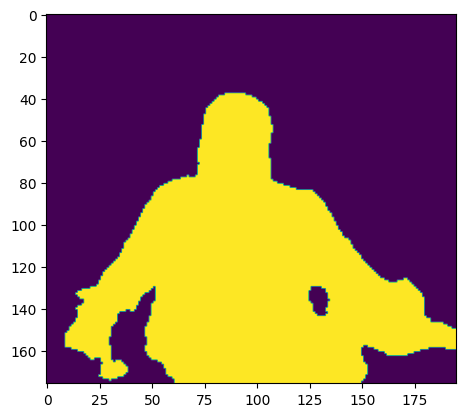

In [50]:
plt.imshow(np.array(output[3]['mask']))
plt.show()

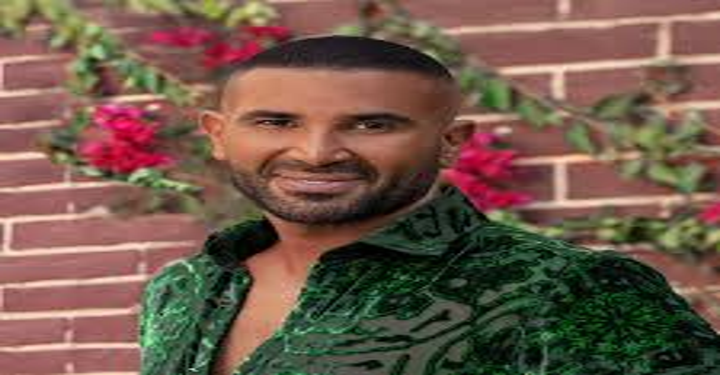

In [60]:
raw_image = Image.open('./pictures/1.jfif')
raw_image.resize((720, 375))

In [58]:
output = pipe(raw_image, points_per_batch=32)
output

[{'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'tree',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'grass',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'plant',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'painting',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'fence',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'signboard',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'flower',
  'mask': <PIL.Image.Imag

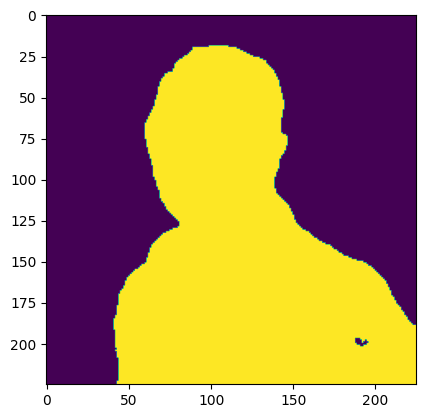

In [59]:
plt.imshow(np.array(output[4]['mask']))
plt.show()

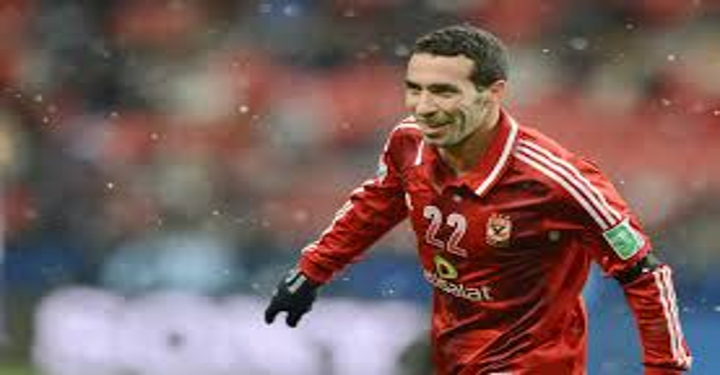

In [61]:
raw_image = Image.open('./pictures/4.jfif')
raw_image.resize((720, 375))

In [ ]:
output = pipe(raw_image, points_per_batch=32)
output

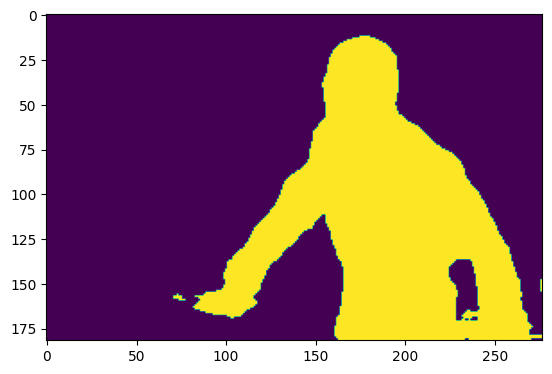

In [63]:
plt.imshow(np.array(output[5]['mask']))
plt.show()

ok so we will keep the second model
 
## Image Functions

In [4]:
cache_dir = "./cache"

pipe = pipeline("image-segmentation", model="Intel/dpt-large-ade")

Some weights of DPTForSemanticSegmentation were not initialized from the model checkpoint at Intel/dpt-large-ade and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.batch_norm1.bias', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.num_batches_tracked', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.running_mean', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.running_var', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.weight', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.bias', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.num_batches_tracked', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.running_mean', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.running_var', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this mo

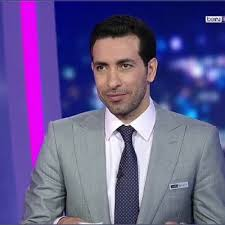

In [21]:
raw_image = Image.open('./pictures/3.jfif')
raw_image#.resize((720, 375))


In [20]:
output = pipe(raw_image, points_per_batch=32)
output

[{'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'ceiling',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'painting',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'signboard',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'counter',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'poster',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'sculpture',
  'mask': <PIL.Image.Image image mode=L size=225x225>},
 {'score': None,
  'label': 'crt screen',
  'mask': <PIL.Image.Image image mode=L size=225x225>}]

In [26]:
person_obj=[obj for obj in output if obj['label']=='person'] # add more?
person_obj
#person_obj[0]['mask']

[{'score': None,
  'label': 'person',
  'mask': <PIL.Image.Image image mode=L size=225x225>}]

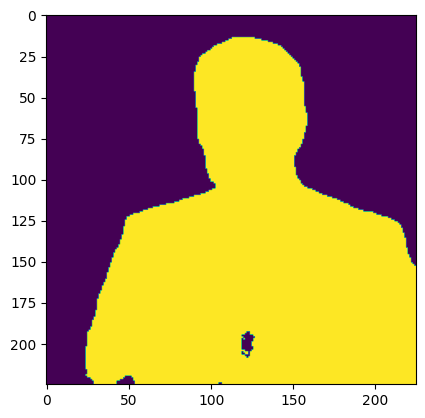

In [73]:
plt.imshow(np.array(output[2]['mask']))
plt.show()

In [74]:
raw_gs_arr=np.array(ImageOps.grayscale(raw_image) )
raw_gs_arr

array([[ 76,  79,  85, ...,  66,  66,  68],
       [ 78,  82,  88, ...,  30,  30,  32],
       [ 66,  70,  78, ...,  13,  13,  15],
       ...,
       [ 71,  71,  72, ..., 100, 103,  95],
       [ 71,  71,  72, ...,  94,  91,  91],
       [ 80,  80,  80, ...,  90,  85,  88]], dtype=uint8)

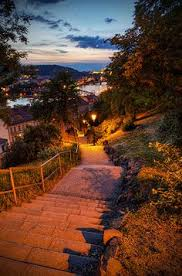

In [27]:
back_image = Image.open('./pictures/backgrounds/1.jfif')
back_image#.resize((720, 375))


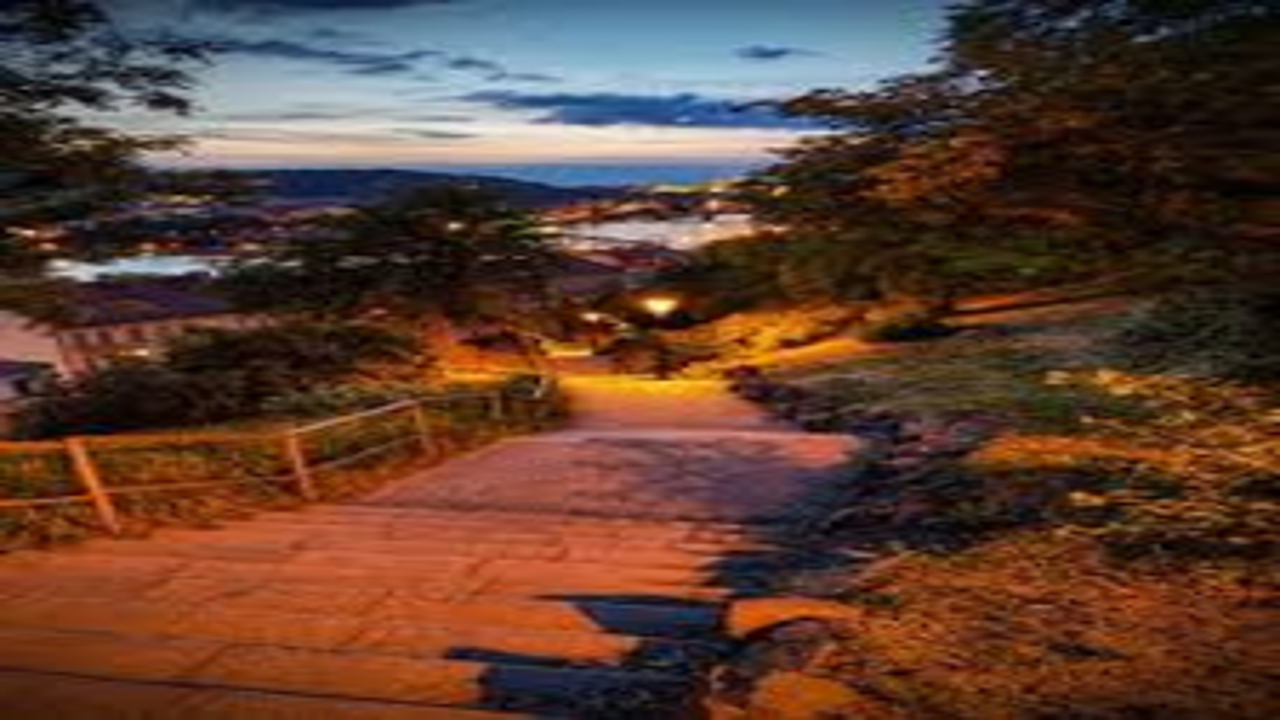

In [56]:
back_image=back_image.resize(raw_image.size)
back_image

In [14]:
def remove_back_grayScale(raw_gs_arr,segment):# wants array input
    outpt=np.zeros(raw_gs_arr.shape)
    for i in range(raw_gs_arr.shape[0]):
        for j in range(raw_gs_arr.shape[1]):
            if (segment[i,j]==255):
                outpt[i,j]=raw_gs_arr[i,j]
    return outpt

In [13]:
def remove_back(raw_image, segment):
    outpt = np.zeros_like(raw_image)# =.zeros(shape)

    for i in range(raw_image.shape[0]):
        for j in range(raw_image.shape[1]):
            if segment[i, j] == 255:
                outpt[i, j] = raw_image[i, j]
            # no need for farther loop as both as you know outpt[i, j] , raw_rgb_arr[i, j] return pf shape 3 , and operations sone same logic
    return outpt


In [12]:
def remove_backRGB_optimized(raw_image, segment):
    # Create a mask where the segment is 255 (foreground)
    mask = segment == 255
    
    # Initialize the output array as zeros, same as before
    outpt = np.zeros_like(raw_image)
    
    # Apply the mask to all 3 channels at once (RGB), copying only where mask is True
    outpt[mask] = raw_image[mask]
    
    return outpt


In [11]:
def replace_backRGB_optimized(raw_image, segment,back_image):
    outpt = np.zeros_like(raw_image)

    mask_object = segment == 255
    mask_back= ~ mask_object ### for those use ~ instead of NOT ,NOT only for single boolean
    
    # Apply the mask to all 3 channels at once (RGB), copying only where mask is True
    outpt[mask_object] = raw_image[mask_object]
    outpt[mask_back] = back_image[mask_back]

    
    return outpt


In [63]:
def cameraToF(raw_image, segment):
    outpt = np.zeros_like(raw_image)
    filtered_image=Image.fromarray(raw_image).filter(ImageFilter.GaussianBlur(radius=23))

    mask_object = segment == 255
    mask_back= ~ mask_object ### for those use ~ instead of NOT ,NOT only for single boolean
    
    # Apply the mask to all 3 channels at once (RGB), copying only where mask is True
    outpt[mask_object] = raw_image[mask_object]
    outpt[mask_back] = np.array(filtered_image)[mask_back]

    
    return outpt


In [70]:
### video 
## the problem is that model is take some while in one picture 

import cv2
import numpy as np


def replace_background_from_video(video_path, output_path,backg_image):

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Get video properties
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object to save the output video
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))


    i=0
    while True:
  
        ret, frame = cap.read()
        if not ret:
            break  # End of video
        
        # Convert the current frame to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        output = pipe(Image.fromarray(np.array(frame_rgb)), points_per_batch=32)

        person_obj=[obj for obj in output if obj['label']=='person'] #----------> add more?

        effect =  replace_backRGB_optimized(np.array(frame_rgb), np.array(person_obj[0]['mask']),backg_image)
        #effect= cameraToF(np.array(frame_rgb), np.array(person_obj[0]['mask']))

        person_obj[0]['mask']

        if (i%20==0):
            print(f"step {i+1} completed")
        out.write(cv2.cvtColor(np.array(effect), cv2.COLOR_RGB2BGR))

        i=i+1
        #if (i==12):
        #    break
        


    # Release everything
    cap.release()
    out.release()
    cv2.destroyAllWindows()

# Sample usage
replace_background_from_video('./videos/1.mp4', './videos/1_modified(2).avi',np.array(back_image))


step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 completed
step 1 complet

KeyboardInterrupt: 

In [ ]:
removed=Image.fromarray(cameraToF(np.array(raw_image),np.array(output[2]['mask'])))

plt.imshow(removed)
plt.show()